"The data for this sentiment analysis project was sourced from Twitter, a popular social media platform known for its real-time user-generated content."

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Tweets.csv")

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"http\S+|www\S+|@[a-zA-Z0-9]+", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

In [8]:
data['clean_text'] = data['text'].apply(preprocess_text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [11]:
X = tfidf_vectorizer.fit_transform(data['clean_text'])
y = data['airline_sentiment']

## Data Visualization: 

C:\Users\Sanket\AppData\Local\Temp\ipykernel_4676\1689771622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments.index, y=sentiments.values, palette="viridis")


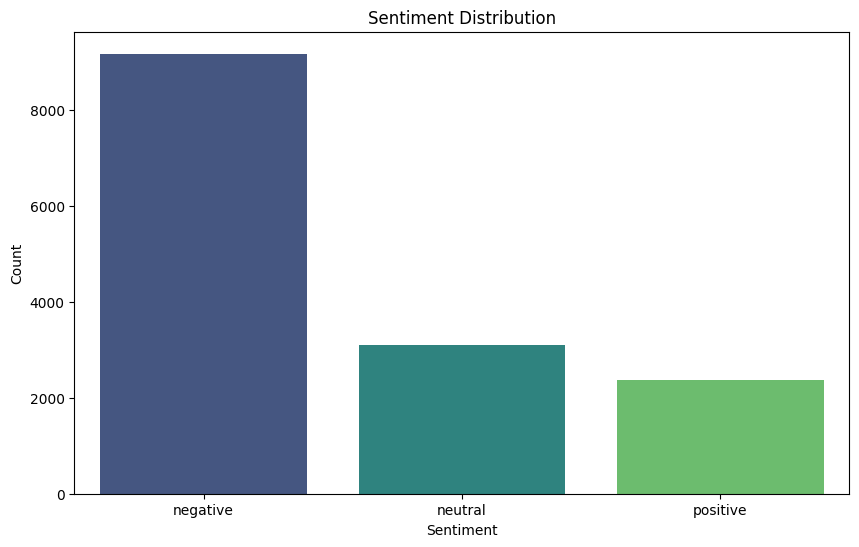

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sentiments = data['airline_sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiments.index, y=sentiments.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


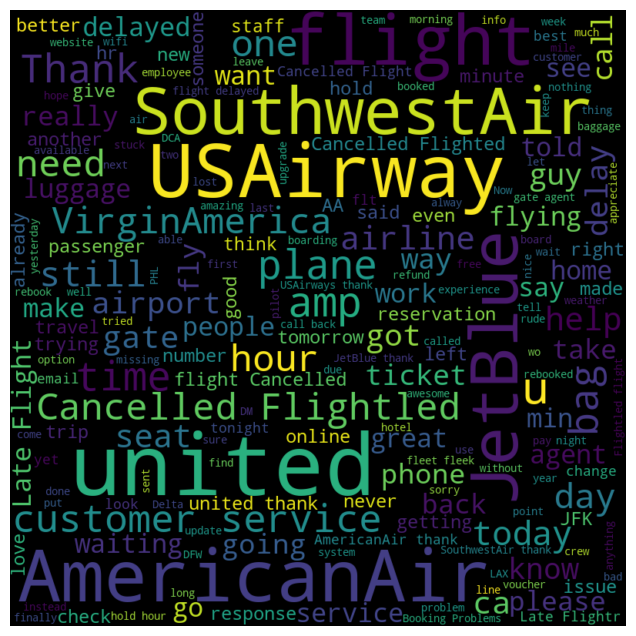

In [13]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(preprocess_text)

wordcloud = WordCloud(width = 800, height = 800, random_state=21, max_font_size = 110).generate(" ".join(data['clean_text']))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

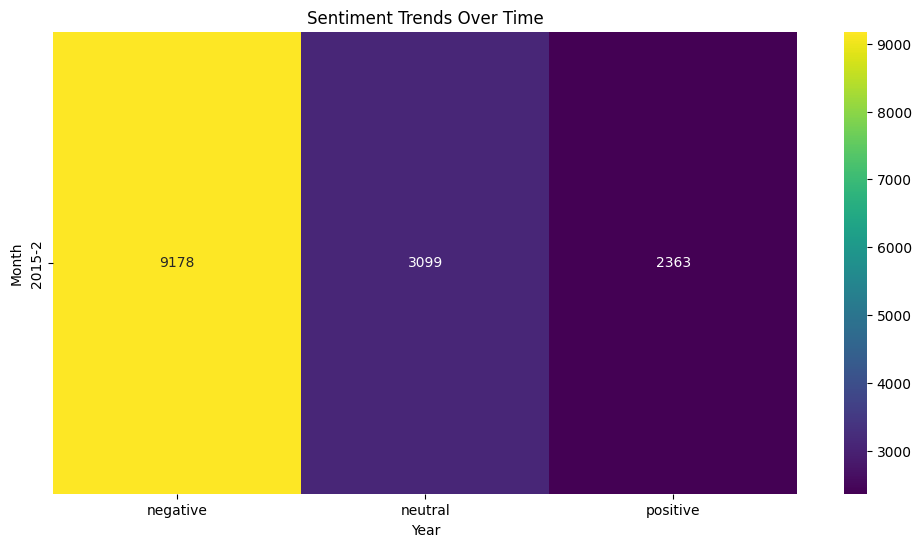

In [14]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data['year'] = data['tweet_created'].dt.year
data['month'] = data['tweet_created'].dt.month

sentiments_by_month = data.groupby([data['year'], data['month']])['airline_sentiment'].value_counts().unstack()
sentiments_by_month.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
sns.heatmap(sentiments_by_month, cmap='viridis', annot=True, fmt='d')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=1000)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'C': [0.1, 1, 10],  
    'penalty': ['l1', 'l2'], 
    'max_iter': [5000, 10000]  
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Model's Accuracy: ", accuracy_score(y_test, y_pred))

Best Parameters:  {'C': 1, 'max_iter': 5000, 'penalty': 'l2'}
Best Score:  0.7764673229449934
Best Model's Accuracy:  0.8029371584699454


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10],  
    'penalty': ['l1', 'l2'], 
    'max_iter': [5000, 10000]  
}

n_iter = 10

random_search = RandomizedSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_iter=n_iter)

random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Model's Accuracy: ", accuracy_score(y_test, y_pred))

Best Parameters:  {'penalty': 'l2', 'max_iter': 10000, 'C': 1}
Best Score:  0.7764673229449934
Best Model's Accuracy:  0.8029371584699454


In [20]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.69      0.49      0.57       580
    positive       0.81      0.62      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [23]:
new_tweet = "I had a great flight experience with @Delta today!"

In [24]:
clean_new_tweet = preprocess_text(new_tweet)

In [25]:
new_tweet_vector = tfidf_vectorizer.transform([clean_new_tweet])

In [26]:
predicted_sentiment = model.predict(new_tweet_vector)

In [27]:
print("Predicted sentiment:", predicted_sentiment[0])

Predicted sentiment: positive


In [28]:
misclassified_indices = y_test[y_test != y_pred].index

misclassified_tweets = data.loc[misclassified_indices, 'text']

for index, tweet in misclassified_tweets.items():
    print(f"Misclassified Tweet {index}: {tweet}")

def updated_preprocess_text(text):
    return text

Misclassified Tweet 8292: @JetBlue I can probably find some of them. Are the ticket #s on there?
Misclassified Tweet 10397: @USAirways Oh well. I'll get to Cancun eventually.
Misclassified Tweet 12542: @AmericanAir and btwn gate a8 &amp; a15 I lost a diamond earring #dayjustgotWORSE! Pls have maintenance look for it!! http://t.co/UieSR3GHHO
Misclassified Tweet 10450: @USAirways #ShoutOut 2 Kristie(sp?) from Gate4 @ PVD today. She's a #RockStar, was a tremendous help in a tough situation. #PromoteThatGirl
Misclassified Tweet 8121: @JetBlue haha no need to apologize 😁 I'll be Flight Booking Problems sooner than Late Flightr. I love JetBlue
Misclassified Tweet 11740: @USAirways nice touch with using my first name.  Very intimate.  I'll be filing a claim soon to be reimbursed. Have a us airways day!
Misclassified Tweet 8727: @JetBlue flight 705. EWR to FLL
Misclassified Tweet 2286: @united hey, I missed my outbound flight - can I still use my return ticket?
Misclassified Tweet 7664: @JetBl

In [29]:
feature_names = tfidf_vectorizer.get_feature_names_out()

coefficients = model.coef_[0]

feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

top_words = feature_coefficients.sort_values(by='Coefficient', ascending=False).head(10)
bottom_words = feature_coefficients.sort_values(by='Coefficient', ascending=True).head(10)

print("Top Words Contributing to Positive Sentiment:")
print(top_words)

print("\nTop Words Contributing to Negative Sentiment:")
print(bottom_words)

Top Words Contributing to Positive Sentiment:
        Feature  Coefficient
2079      hours     3.475589
4924      worst     2.949926
1204    delayed     2.917133
2076       hour     2.566994
2090        hrs     2.403537
616   cancelled     2.387297
2021       hold     2.251426
2643    luggage     2.185065
1203      delay     2.164500
1653        fix     2.144127

Top Words Contributing to Negative Sentiment:
            Feature  Coefficient
4383          thank    -4.244181
4386         thanks    -3.843694
4746  virginamerica    -2.815767
2335        jetblue    -2.748071
4155   southwestair    -2.475306
2621           love    -2.216932
1863          great    -2.133780
365         awesome    -1.969609
148         amazing    -1.945213
4921        worries    -1.792266
